In [1]:
import sys
sys.path.append("../")
from utils.datasets import Datasets
from utils.classifier import Classifier
from utils.save_results import save_info, plot_graph

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

import numpy as np

In [2]:
SEED = 1
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

#Dataset config
DATASET = 'CIFAR10'
DATASET_DIR = './dataset'
BATCH_SIZE = 100
NUM_WORKERS = 2

#Optimizer config
WEIGHT_DECAY = 0.001
LEARNING_RATE = 0.01
GAMMA = 0.1
STEPS = 30

#Training config
EPOCH = 100

In [3]:
torch.cuda.manual_seed_all(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
train_trans = transforms.Compose(
    [
        #transforms.RandomCrop(32, padding=4),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        #transforms.Normalize((0.485, 0.456, 0.406),
        #                     (0.229, 0.224, 0.225)),
    ],
)
test_trans = transforms.Compose(
    [
        transforms.ToTensor(),
        #transforms.Normalize((0.485, 0.456, 0.406),
        #                     (0.229, 0.224, 0.225)),
    ],
)
instance_datasets = Datasets(
    DATASET,
    BATCH_SIZE,
    NUM_WORKERS,
    transform=train_trans,
    test_transform=test_trans,
    dataset_dir=DATASET_DIR,
)
data_sets = instance_datasets.create()

trainloader = data_sets[0]
testloader = data_sets[1]
classes = data_sets[2]
based_labels = data_sets[3]
input_channels = data_sets[4]
trainset = data_sets[5]
testset = data_sets[6]

Dataset : CIFAR10
set train data
Files already downloaded and verified
set test data
Files already downloaded and verified


In [5]:
model = torchvision.models.resnet34(pretrained=True)
model.fc = nn.Linear(512, len(classes))
model = model.to(device)

optimizer = optim.SGD(
    model.parameters(),
    lr=LEARNING_RATE,
    momentum=0.9,
    weight_decay=WEIGHT_DECAY,
)
scheduler = optim.lr_scheduler.StepLR(
    optimizer,
    step_size=STEPS,
    gamma=GAMMA,
)

criterion = nn.CrossEntropyLoss()

cf = Classifier(
    model,
    optimizer,
    criterion,
)

In [6]:
losses, accuracies = cf.fit(
    EPOCH,
    trainloader,
    testloader,
    scheduler=scheduler,
    device=device,
)

epoch:1


100%|██████████| 500/500 [00:15<00:00, 31.93it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 95.83it/s] 


mean_loss=0.5615937848091126, acc=0.81226
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 88.85it/s]


mean_loss=0.6809468382596969, acc=0.7704
epoch:2


100%|██████████| 500/500 [00:15<00:00, 32.31it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:04<00:00, 100.89it/s]


mean_loss=0.4486415135860443, acc=0.8458
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.15it/s]


mean_loss=0.6699600678682327, acc=0.7793
epoch:3


100%|██████████| 500/500 [00:15<00:00, 33.10it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:04<00:00, 100.14it/s]


mean_loss=0.3490202057957649, acc=0.8797
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.37it/s]


mean_loss=0.6327488178014755, acc=0.7878
epoch:4


100%|██████████| 500/500 [00:15<00:00, 32.95it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:04<00:00, 100.19it/s]


mean_loss=0.37308895006775855, acc=0.87028
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.17it/s]


mean_loss=0.7410642251372337, acc=0.7693
epoch:5


100%|██████████| 500/500 [00:15<00:00, 32.44it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.30it/s] 


mean_loss=0.4270861093699932, acc=0.85546
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.54it/s]


mean_loss=0.8246432802081108, acc=0.7492
epoch:6


100%|██████████| 500/500 [00:15<00:00, 32.06it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.19it/s] 


mean_loss=0.1932415352165699, acc=0.93516
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.76it/s]


mean_loss=0.6188292908668518, acc=0.8112
epoch:7


100%|██████████| 500/500 [00:15<00:00, 32.18it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.31it/s] 


mean_loss=0.19671483425796032, acc=0.93396
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.54it/s]


mean_loss=0.6954653617739678, acc=0.7923
epoch:8


100%|██████████| 500/500 [00:15<00:00, 32.48it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.17it/s] 


mean_loss=0.22472203168272972, acc=0.92316
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.67it/s]


mean_loss=0.7740050947666168, acc=0.775
epoch:9


100%|██████████| 500/500 [00:15<00:00, 32.29it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.56it/s] 


mean_loss=0.3516571817696095, acc=0.88314
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.17it/s]


mean_loss=0.9116969120502472, acc=0.7487
epoch:10


100%|██████████| 500/500 [00:15<00:00, 32.50it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.09it/s] 


mean_loss=0.37499235293269156, acc=0.88236
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.47it/s] 


mean_loss=1.0087004846334457, acc=0.7483
epoch:11


100%|██████████| 500/500 [00:15<00:00, 32.47it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.84it/s] 


mean_loss=0.18648256166279317, acc=0.93732
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.92it/s]


mean_loss=0.7559500476717949, acc=0.7868
epoch:12


100%|██████████| 500/500 [00:15<00:00, 31.97it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.36it/s] 


mean_loss=0.13054955278337002, acc=0.9564
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.29it/s] 


mean_loss=0.7057935857772827, acc=0.8043
epoch:13


100%|██████████| 500/500 [00:15<00:00, 32.02it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 94.34it/s] 


mean_loss=0.14136128520220517, acc=0.95102
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 89.38it/s]


mean_loss=0.736524803340435, acc=0.7975
epoch:14


100%|██████████| 500/500 [00:15<00:00, 32.08it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.82it/s] 


mean_loss=0.1394256125241518, acc=0.95268
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.84it/s]


mean_loss=0.7536577716469764, acc=0.7874
epoch:15


100%|██████████| 500/500 [00:15<00:00, 32.36it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.70it/s] 


mean_loss=0.18792882610857486, acc=0.93486
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.19it/s]


mean_loss=0.8047845038771629, acc=0.7816
epoch:16


100%|██████████| 500/500 [00:15<00:00, 32.78it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:04<00:00, 100.03it/s]


mean_loss=0.12100950938090682, acc=0.95938
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.93it/s]


mean_loss=0.7562839463353157, acc=0.7914
epoch:17


100%|██████████| 500/500 [00:15<00:00, 32.76it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.85it/s] 


mean_loss=0.19297020303457976, acc=0.93466
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.00it/s]


mean_loss=0.8401360860466958, acc=0.7754
epoch:18


100%|██████████| 500/500 [00:15<00:00, 31.96it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 97.22it/s] 


mean_loss=0.2550410783439875, acc=0.91706
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.43it/s]


mean_loss=0.912798000574112, acc=0.7624
epoch:19


100%|██████████| 500/500 [00:15<00:00, 32.42it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.95it/s] 


mean_loss=0.1359671638160944, acc=0.95294
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.56it/s] 


mean_loss=0.7680731454491615, acc=0.7891
epoch:20


100%|██████████| 500/500 [00:15<00:00, 32.64it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.80it/s] 


mean_loss=0.19232818991690875, acc=0.9335
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.36it/s]


mean_loss=0.8459243142604828, acc=0.7716
epoch:21


100%|██████████| 500/500 [00:15<00:00, 32.72it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.84it/s] 


mean_loss=0.1507024228014052, acc=0.94868
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.64it/s]


mean_loss=0.8091722699999809, acc=0.7894
epoch:22


100%|██████████| 500/500 [00:15<00:00, 32.77it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.94it/s] 


mean_loss=0.10104286020249129, acc=0.96592
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.54it/s]


mean_loss=0.777326706647873, acc=0.796
epoch:23


100%|██████████| 500/500 [00:15<00:00, 32.64it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.19it/s] 


mean_loss=0.4261649203300476, acc=0.87216
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.92it/s]


mean_loss=1.0776908349990846, acc=0.72
epoch:24


100%|██████████| 500/500 [00:16<00:00, 31.02it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.78it/s] 


mean_loss=0.173041518189013, acc=0.94082
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.12it/s]


mean_loss=0.8454381737112999, acc=0.7766
epoch:25


100%|██████████| 500/500 [00:15<00:00, 32.14it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 95.32it/s] 


mean_loss=0.10748293784633278, acc=0.96416
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.20it/s]


mean_loss=0.7632690253853798, acc=0.7939
epoch:26


100%|██████████| 500/500 [00:15<00:00, 32.09it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 94.32it/s] 


mean_loss=0.18543344992399216, acc=0.9375
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.21it/s] 


mean_loss=0.882308441400528, acc=0.767
epoch:27


100%|██████████| 500/500 [00:15<00:00, 32.65it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:04<00:00, 100.44it/s]


mean_loss=0.08849964490160346, acc=0.97056
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.73it/s]


mean_loss=0.7740789723396301, acc=0.7923
epoch:28


100%|██████████| 500/500 [00:15<00:00, 31.37it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 95.53it/s] 


mean_loss=0.09966019984707236, acc=0.96686
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 89.78it/s]


mean_loss=0.7624061384797096, acc=0.788
epoch:29


100%|██████████| 500/500 [00:15<00:00, 31.79it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.24it/s] 


mean_loss=0.11731341348960996, acc=0.96044
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 90.08it/s]


mean_loss=0.7924779054522514, acc=0.7841
epoch:30


100%|██████████| 500/500 [00:15<00:00, 31.97it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.01it/s] 


mean_loss=0.12831320636346935, acc=0.95568
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 90.57it/s]


mean_loss=0.8044290053844452, acc=0.7801
epoch:31


100%|██████████| 500/500 [00:15<00:00, 32.15it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 94.93it/s] 


mean_loss=0.006087443039752543, acc=0.99972
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.55it/s] 


mean_loss=0.6414709335565567, acc=0.8359
epoch:32


100%|██████████| 500/500 [00:15<00:00, 32.11it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.84it/s] 


mean_loss=0.002647339643444866, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.27it/s]


mean_loss=0.664951753616333, acc=0.8389
epoch:33


100%|██████████| 500/500 [00:15<00:00, 32.39it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.24it/s] 


mean_loss=0.0016973999567562715, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 89.44it/s]


mean_loss=0.6870800471305847, acc=0.8394
epoch:34


100%|██████████| 500/500 [00:15<00:00, 32.52it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.29it/s] 


mean_loss=0.0012345568931195884, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.90it/s]


mean_loss=0.6967075768113137, acc=0.8394
epoch:35


100%|██████████| 500/500 [00:15<00:00, 32.62it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.90it/s] 


mean_loss=0.0009614616572507657, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.54it/s]


mean_loss=0.7061163201928139, acc=0.8409
epoch:36


100%|██████████| 500/500 [00:15<00:00, 32.74it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.36it/s] 


mean_loss=0.0008214812970254571, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.34it/s]


mean_loss=0.715246841609478, acc=0.8413
epoch:37


100%|██████████| 500/500 [00:15<00:00, 31.83it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 97.17it/s] 


mean_loss=0.0006950317537412047, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 81.99it/s]


mean_loss=0.7180494105815888, acc=0.8424
epoch:38


100%|██████████| 500/500 [00:15<00:00, 31.91it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 97.07it/s] 


mean_loss=0.0006395521806553007, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.50it/s]


mean_loss=0.7224539548158646, acc=0.8413
epoch:39


100%|██████████| 500/500 [00:15<00:00, 32.24it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.92it/s] 


mean_loss=0.0006099957670085132, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.11it/s] 


mean_loss=0.7304859277606011, acc=0.8399
epoch:40


100%|██████████| 500/500 [00:15<00:00, 32.50it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.94it/s] 


mean_loss=0.0005506937564350665, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.37it/s] 


mean_loss=0.7288653293251991, acc=0.8404
epoch:41


100%|██████████| 500/500 [00:15<00:00, 32.41it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 97.98it/s] 


mean_loss=0.000538701681944076, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 85.56it/s]


mean_loss=0.7273022827506065, acc=0.8424
epoch:42


100%|██████████| 500/500 [00:15<00:00, 31.80it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 97.03it/s] 


mean_loss=0.0005038630636408925, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 86.77it/s]


mean_loss=0.7312168869376182, acc=0.8407
epoch:43


100%|██████████| 500/500 [00:15<00:00, 32.21it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.35it/s] 


mean_loss=0.0004855949007323943, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.21it/s]


mean_loss=0.7364483714103699, acc=0.8428
epoch:44


100%|██████████| 500/500 [00:15<00:00, 32.09it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 97.56it/s] 


mean_loss=0.0004719277375843376, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.03it/s]


mean_loss=0.7346400377154351, acc=0.8435
epoch:45


100%|██████████| 500/500 [00:15<00:00, 32.49it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.23it/s] 


mean_loss=0.00044952274754177777, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 90.73it/s]


mean_loss=0.734651081264019, acc=0.844
epoch:46


100%|██████████| 500/500 [00:15<00:00, 32.45it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.34it/s] 


mean_loss=0.0004578402791521512, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.59it/s]


mean_loss=0.7352276909351348, acc=0.8435
epoch:47


100%|██████████| 500/500 [00:15<00:00, 31.92it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 97.79it/s] 


mean_loss=0.00046233012882294136, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.72it/s]


mean_loss=0.7352100732922554, acc=0.8404
epoch:48


100%|██████████| 500/500 [00:15<00:00, 32.42it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 95.49it/s] 


mean_loss=0.0004508816466550343, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 88.53it/s]


mean_loss=0.733487828373909, acc=0.8443
epoch:49


100%|██████████| 500/500 [00:15<00:00, 31.49it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.53it/s] 


mean_loss=0.0004352141198469326, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.54it/s]


mean_loss=0.740049920976162, acc=0.8439
epoch:50


100%|██████████| 500/500 [00:15<00:00, 32.61it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.16it/s] 


mean_loss=0.000443607444758527, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.62it/s]


mean_loss=0.7407415726780892, acc=0.8422
epoch:51


100%|██████████| 500/500 [00:15<00:00, 32.72it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.29it/s] 


mean_loss=0.0004454244080116041, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.58it/s] 


mean_loss=0.7344801867008209, acc=0.8427
epoch:52


100%|██████████| 500/500 [00:15<00:00, 32.69it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.75it/s] 


mean_loss=0.0004241877413587645, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.76it/s]


mean_loss=0.7378122156858444, acc=0.8445
epoch:53


100%|██████████| 500/500 [00:15<00:00, 32.73it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.34it/s] 


mean_loss=0.0004383905261638574, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.82it/s] 


mean_loss=0.7365510159730911, acc=0.845
epoch:54


100%|██████████| 500/500 [00:15<00:00, 32.60it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.65it/s] 


mean_loss=0.00044942282361444086, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.07it/s]


mean_loss=0.7419506505131721, acc=0.8429
epoch:55


100%|██████████| 500/500 [00:15<00:00, 32.17it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.07it/s] 


mean_loss=0.0004492740532150492, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.81it/s]


mean_loss=0.7358196321129798, acc=0.8441
epoch:56


100%|██████████| 500/500 [00:15<00:00, 31.65it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.74it/s] 


mean_loss=0.00046409034979296847, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.17it/s]


mean_loss=0.7322670969367028, acc=0.8444
epoch:57


100%|██████████| 500/500 [00:15<00:00, 31.88it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.76it/s] 


mean_loss=0.0004737628190778196, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.43it/s]


mean_loss=0.7336004611849785, acc=0.8429
epoch:58


100%|██████████| 500/500 [00:15<00:00, 32.92it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:04<00:00, 100.37it/s]


mean_loss=0.0004706931138643995, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.54it/s]


mean_loss=0.740285592675209, acc=0.8433
epoch:59


100%|██████████| 500/500 [00:15<00:00, 32.96it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.76it/s] 


mean_loss=0.0004970871784607879, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.71it/s]


mean_loss=0.7319898909330368, acc=0.8437
epoch:60


100%|██████████| 500/500 [00:15<00:00, 32.92it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:04<00:00, 100.63it/s]


mean_loss=0.00048342656227760015, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.20it/s]


mean_loss=0.733234968483448, acc=0.8436
epoch:61


100%|██████████| 500/500 [00:15<00:00, 32.95it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.39it/s] 


mean_loss=0.00048354464152362196, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 89.14it/s]


mean_loss=0.7366242110729218, acc=0.8435
epoch:62


100%|██████████| 500/500 [00:15<00:00, 31.64it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 97.32it/s] 


mean_loss=0.0004914233229937964, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 90.70it/s]


mean_loss=0.7353657877445221, acc=0.845
epoch:63


100%|██████████| 500/500 [00:15<00:00, 32.21it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.25it/s] 


mean_loss=0.0005122455675737001, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.26it/s]


mean_loss=0.729565172791481, acc=0.8454
epoch:64


100%|██████████| 500/500 [00:15<00:00, 32.10it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 97.83it/s] 


mean_loss=0.0004834655647864565, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 90.61it/s]


mean_loss=0.7369428372383118, acc=0.8436
epoch:65


100%|██████████| 500/500 [00:15<00:00, 32.10it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 96.08it/s] 


mean_loss=0.0004977219474385493, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.13it/s] 


mean_loss=0.7306047031283378, acc=0.8448
epoch:66


100%|██████████| 500/500 [00:15<00:00, 32.50it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.22it/s] 


mean_loss=0.0005050840395851992, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.48it/s]


mean_loss=0.7393094566464424, acc=0.8454
epoch:67


100%|██████████| 500/500 [00:15<00:00, 32.49it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 94.36it/s] 


mean_loss=0.000494375996873714, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 89.41it/s]


mean_loss=0.7346648052334785, acc=0.844
epoch:68


100%|██████████| 500/500 [00:15<00:00, 31.72it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 91.71it/s] 


mean_loss=0.0005032349238172174, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.34it/s]


mean_loss=0.7393314525485039, acc=0.8425
epoch:69


100%|██████████| 500/500 [00:15<00:00, 31.69it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:04<00:00, 100.57it/s]


mean_loss=0.000492208574723918, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.45it/s]


mean_loss=0.7375229606032372, acc=0.844
epoch:70


100%|██████████| 500/500 [00:15<00:00, 32.37it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 96.59it/s] 


mean_loss=0.0004920652584405616, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 78.32it/s]


mean_loss=0.7368201178312301, acc=0.8445
epoch:71


100%|██████████| 500/500 [00:15<00:00, 31.93it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.08it/s] 


mean_loss=0.0005081823299406096, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.75it/s] 


mean_loss=0.7316470429301262, acc=0.8452
epoch:72


100%|██████████| 500/500 [00:15<00:00, 32.55it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.46it/s] 


mean_loss=0.00048694426129804923, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 89.68it/s]


mean_loss=0.7336074209213257, acc=0.8446
epoch:73


100%|██████████| 500/500 [00:15<00:00, 32.11it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 94.75it/s] 


mean_loss=0.0004991929502575659, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.27it/s]


mean_loss=0.7304964777827263, acc=0.8453
epoch:74


100%|██████████| 500/500 [00:15<00:00, 32.37it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 96.13it/s] 


mean_loss=0.0005018179640755989, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 87.87it/s]


mean_loss=0.7314138576388359, acc=0.8452
epoch:75


100%|██████████| 500/500 [00:15<00:00, 32.66it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 96.20it/s] 


mean_loss=0.0004922644475591368, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 82.77it/s]


mean_loss=0.731198051571846, acc=0.8463
epoch:76


100%|██████████| 500/500 [00:15<00:00, 32.37it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.28it/s] 


mean_loss=0.0004945738014066592, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.31it/s]


mean_loss=0.7362872126698494, acc=0.845
epoch:77


100%|██████████| 500/500 [00:15<00:00, 32.37it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 97.28it/s] 


mean_loss=0.0005027243685908616, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.14it/s]


mean_loss=0.7310315373539925, acc=0.8452
epoch:78


100%|██████████| 500/500 [00:15<00:00, 32.47it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.74it/s] 


mean_loss=0.0005075967250159011, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 90.22it/s]


mean_loss=0.7344592559337616, acc=0.8457
epoch:79


100%|██████████| 500/500 [00:15<00:00, 32.10it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 96.98it/s] 


mean_loss=0.0004957795710652136, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 90.53it/s]


mean_loss=0.7352177000045776, acc=0.8467
epoch:80


100%|██████████| 500/500 [00:15<00:00, 31.73it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.04it/s] 


mean_loss=0.0004962690373649821, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.96it/s]


mean_loss=0.7391748148202896, acc=0.8444
epoch:81


100%|██████████| 500/500 [00:15<00:00, 32.16it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.55it/s] 


mean_loss=0.0004924703626311384, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 87.47it/s]


mean_loss=0.7336243042349815, acc=0.8446
epoch:82


100%|██████████| 500/500 [00:15<00:00, 32.53it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.74it/s] 


mean_loss=0.0004964502955554053, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.19it/s]


mean_loss=0.7400385290384293, acc=0.8427
epoch:83


100%|██████████| 500/500 [00:15<00:00, 32.34it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.88it/s] 


mean_loss=0.0005119327991851605, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.66it/s]


mean_loss=0.7323541128635407, acc=0.8454
epoch:84


100%|██████████| 500/500 [00:15<00:00, 32.14it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.17it/s] 


mean_loss=0.0005049060038872994, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.90it/s]


mean_loss=0.7315715208649636, acc=0.8453
epoch:85


100%|██████████| 500/500 [00:15<00:00, 32.71it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.08it/s] 


mean_loss=0.0004941894474322908, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 89.46it/s]


mean_loss=0.7341328653693199, acc=0.8449
epoch:86


100%|██████████| 500/500 [00:15<00:00, 32.42it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.76it/s] 


mean_loss=0.0005104267741553486, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.87it/s]


mean_loss=0.7306178268790245, acc=0.8451
epoch:87


100%|██████████| 500/500 [00:15<00:00, 32.75it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 95.40it/s] 


mean_loss=0.0005021335573983379, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 80.57it/s]


mean_loss=0.7345644247531891, acc=0.8446
epoch:88


100%|██████████| 500/500 [00:15<00:00, 31.81it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.04it/s] 


mean_loss=0.0004933605553815141, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.54it/s]


mean_loss=0.7357398921251297, acc=0.8443
epoch:89


100%|██████████| 500/500 [00:15<00:00, 32.85it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 99.51it/s] 


mean_loss=0.0005140385714475997, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.52it/s]


mean_loss=0.7272904953360557, acc=0.8446
epoch:90


100%|██████████| 500/500 [00:15<00:00, 32.95it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.99it/s] 


mean_loss=0.0005019303805893288, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 93.37it/s]


mean_loss=0.733150574862957, acc=0.845
epoch:91


100%|██████████| 500/500 [00:15<00:00, 32.96it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 96.46it/s] 


mean_loss=0.0005211550748208538, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 88.46it/s]


mean_loss=0.7295837876200676, acc=0.847
epoch:92


100%|██████████| 500/500 [00:15<00:00, 32.14it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.07it/s] 


mean_loss=0.0005066591129871085, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.19it/s] 


mean_loss=0.7325250923633575, acc=0.8447
epoch:93


100%|██████████| 500/500 [00:15<00:00, 31.98it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 97.66it/s] 


mean_loss=0.0004944171722745523, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 90.02it/s]


mean_loss=0.7322691345214843, acc=0.8445
epoch:94


100%|██████████| 500/500 [00:15<00:00, 32.50it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.26it/s] 


mean_loss=0.0005123621264356188, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.36it/s]


mean_loss=0.732244356572628, acc=0.8445
epoch:95


100%|██████████| 500/500 [00:15<00:00, 32.31it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.85it/s] 


mean_loss=0.0004965717660379596, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 88.77it/s]


mean_loss=0.7319583043456077, acc=0.8452
epoch:96


100%|██████████| 500/500 [00:15<00:00, 32.41it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.40it/s] 


mean_loss=0.0005087238152045757, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.71it/s]


mean_loss=0.734027518928051, acc=0.8463
epoch:97


100%|██████████| 500/500 [00:15<00:00, 32.41it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 98.73it/s] 


mean_loss=0.000517084787483327, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.49it/s]


mean_loss=0.7330486491322518, acc=0.8462
epoch:98


100%|██████████| 500/500 [00:15<00:00, 32.21it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 97.24it/s] 


mean_loss=0.000520402894646395, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 92.09it/s] 


mean_loss=0.7356257045269012, acc=0.8445
epoch:99


100%|██████████| 500/500 [00:15<00:00, 32.52it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:04<00:00, 100.26it/s]


mean_loss=0.0005046746812877246, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 90.53it/s]


mean_loss=0.735028566122055, acc=0.8447
epoch:100


100%|██████████| 500/500 [00:15<00:00, 32.28it/s]


Training data results-----------------------------


100%|██████████| 500/500 [00:05<00:00, 96.41it/s] 


mean_loss=0.0005082640915061347, acc=1.0
Test data results---------------------------------


100%|██████████| 100/100 [00:01<00:00, 91.79it/s]

mean_loss=0.7318832990527153, acc=0.8458


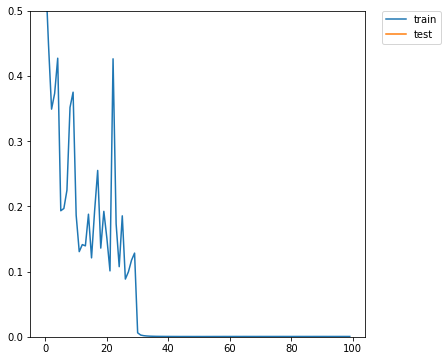

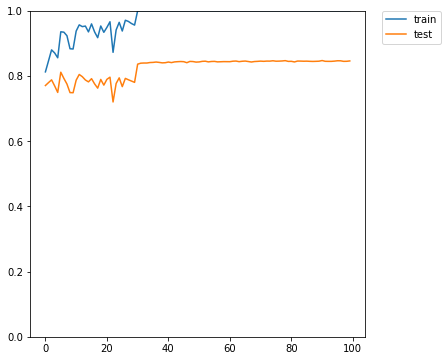

In [7]:
plot_graph(losses, 0.5, filename="loss")
plot_graph(accuracies, 1, filename="accuracy")

In [8]:
info = {}
info["DATASET"] = DATASET
info["Learnign_rate"] = LEARNING_RATE
info["Weight_decay"] = WEIGHT_DECAY
info["EPOCH"] = EPOCH
info["STEPS"] = STEPS
info["GAMMA"] = GAMMA
info["Model"] = model
info["Criterion"] = criterion
info["Optimizer"] = optimizer
info["train_loss"] = losses["train"][-1]
info["test_loss"] = losses["test"][-1]
info["train_acc"] = accuracies["train"][-1]
info["test_acc"] = accuracies["test"][-1]

In [9]:
save_info(info, DATASET+"_info")

In [11]:
torch.save(model.cpu().state_dict(), 'teacher_param.pth')
torch.save(model.cpu(), 'teacher_model.pth')